In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
df = pd.DataFrame(
    {
        'mother height' : [58,62,60,64,67,70],
        'daughter height' : [60,60,58,60,70,72]
    }
)
x = df['mother height'].to_numpy()
y = df['daughter height'].to_numpy()
n = len(x)
df.head()

,mother height,daughter height
0,58,60
1,62,60
2,60,58
3,64,60
4,67,70


In [121]:
b0 = 0
b1 = 0

alpha = 0.00029
epochs = 4
errors = []

for i in range(epochs):
    p = b0 + b1*x
    error = p - y
    errors.append(error)
    b0 = b0 - alpha*(1/n)*(np.sum(error))
    b1 = b1 - alpha*(1/n)*(np.sum(error*x))

print(f"Intercept b0: {b0}")
print(f"Coeffcient b1: {b1}")

Intercept b0: 0.015574426110041888
Coeffcient b1: 0.9970609443084448


In [122]:
from sklearn.linear_model import LinearRegression
x = x.reshape(-1,1)
y = y.reshape(-1,1)
model = LinearRegression()
model.fit(x,y)

print(f"model intercept b0: {model.intercept_}")
print(f"model coefficent b1: {model.coef_}")

model_pred = model.predict(x)

print(f"model predictions : {model_pred}")

model intercept b0: [-13.24958124]
model coefficent b1: [[1.20603015]]
model predictions : [[56.7001675 ]
 [61.52428811]
 [59.11222781]
 [63.93634841]
 [67.55443886]
 [71.17252931]]


In [123]:
# evaluting the model I build with the sklearn one
from sklearn.metrics import mean_squared_error

my_pred = b0 + b1*x
print(my_pred)

RMSE = mean_squared_error(y,my_pred, squared=False)
model_RMSE = mean_squared_error(y, model_pred, squared=False)
MSE = mean_squared_error(y,my_pred)
model_MSE = mean_squared_error(y,model_pred)

print(f"RMSE of my model: {RMSE}")
print(f"RMSE of sklearn model: {model_RMSE}")
print(f"MSE of my model: {MSE}")
print(f"MSE of sklearn model: {model_MSE}")

[[57.8451092 ]
 [61.83335297]
 [59.83923108]
 [63.82747486]
 [66.81865769]
 [69.80984053]]
RMSE of my model: 2.6126235115765777
RMSE of sklearn model: 2.470145584200829
MSE of my model: 6.825801613242727
MSE of sklearn model: 6.101619207146855


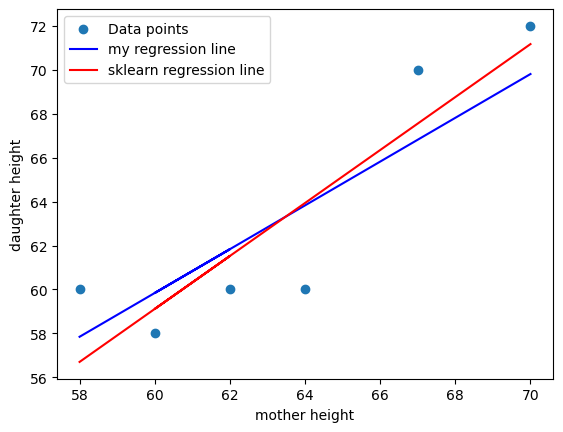

In [125]:
plt.scatter(x,y, label="Data points")
plt.plot(x, my_pred, color="blue", label="my regression line")
plt.plot(x, model_pred, color="red", label="sklearn regression line")
plt.xlabel("mother height")
plt.ylabel("daughter height")
plt.legend()
plt.show()

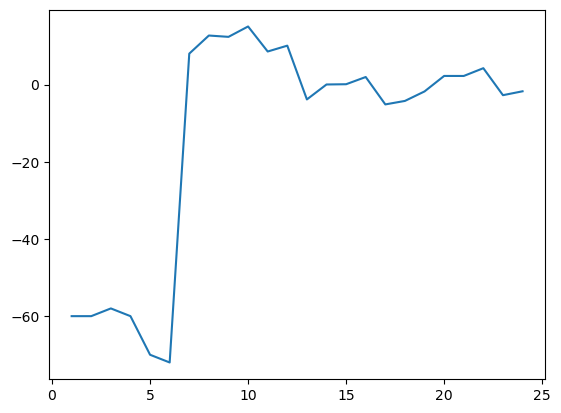

In [133]:
# plotting graph of error vs iteration in each epochs
iterations = np.arange(1,25).reshape(-1,1)
errors = np.array(errors).reshape(24,1)

plt.plot(iterations, errors)
# x and y must have same first dimension, but have shapes (24, 1) and (4, 6)